In [70]:
#cellno.59 we are adding an other column 'internetservice'  -> becomes a 3 class classifier

In [257]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder,OneHotEncoder
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


In [216]:
churn = pd.read_csv('churn.csv')
churn.columns = [i.lower() for i in churn.columns]
churn

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [140]:
X = churn[churn.tenure<=30][["tenure","monthlycharges","internetservice"]]
y = churn[churn.tenure<=30]['churn']
X.shape,y.shape

((3641, 3), (3641,))

In [141]:
#LabelEncoder is a class, for which we need instance, encoding is an instance
encoding = LabelEncoder()
#Encode target labels with value between 0 and n_classes-1.
encoding.fit(X['internetservice'])
#We are encoding only 1 column # When we say fit 
encoding.transform(X['internetservice'])

array([0, 0, 1, ..., 0, 0, 1])

In [142]:
encoding = LabelEncoder()
encoding.fit(X['internetservice']) #We are encoding only one column
encoding.transform(X['internetservice'])

array([0, 0, 1, ..., 0, 0, 1])

In [143]:
#After transforming how many unique values are there 
np.unique(encoding.transform(X['internetservice']),return_counts=True)

(array([0, 1, 2]), array([1240, 1560,  841]))

In [144]:
X.head()

,tenure,monthlycharges,internetservice
0,1,29.85,DSL
2,2,53.85,DSL
4,2,70.70,Fiber optic
5,8,99.65,Fiber optic
6,22,89.10,Fiber optic


In [145]:
X.internetservice.value_counts()

internetservice
Fiber optic    1560
DSL            1240
No              841
Name: count, dtype: int64

In [91]:
#Alphabetically DSL is 0, Fiber optic is 1, No is going to be 2

In [147]:
#now converting the encoded values to actual values 
X['internetservice'] = encoding.fit_transform(X['internetservice'])

In [148]:
X.head()

,tenure,monthlycharges,internetservice
0,1,29.85,0
2,2,53.85,0
4,2,70.70,1
5,8,99.65,1
6,22,89.10,1


In [156]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=10,test_size=1000) #let us increase from 400 samples to 1000 samples
X_train.shape,X_test.shape

((2641, 3), (1000, 3))

In [153]:
#because samples are doubled # do not worry about the accuracy of the model

In [154]:
#accuracy has been increased from 63 to 76

In [157]:
model = DecisionTreeClassifier(criterion = 'entropy')
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.635

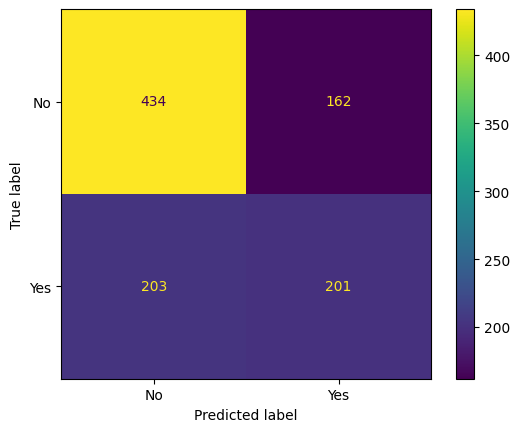

In [159]:
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test)

In [164]:
#What if we have multiple columns which needs to be converter from "Textural Categrorical" to "Numerical Categorical" 

#adding "streamingtv","streamingmovies"

In [199]:
X = churn[["tenure","monthlycharges","internetservice","streamingtv","streamingmovies","gender"]]
y = churn['churn']
X.shape,y.shape

((7043, 6), (7043,))

In [185]:
X.head()

,tenure,monthlycharges,internetservice,streamingtv,streamingmovies
0,1,29.85,DSL,No,No
1,34,56.95,DSL,No,No
2,2,53.85,DSL,No,No
3,45,42.30,DSL,No,No
4,2,70.70,Fiber optic,No,No


In [186]:
X.internetservice.value_counts()

internetservice
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

In [187]:
encoding = LabelEncoder()
X['tenure'] = encoding.fit_transform(X['tenure'])
X['internetservice'] = encoding.fit_transform(X['internetservice'])
X['streamingtv'] = encoding.fit_transform(X['streamingtv'])
X['streamingmovies'] = encoding.fit_transform(X['streamingmovies'])

/var/folders/_3/jzb7vx0x3fdcjx3klwsmphnw0000gn/T/ipykernel_47561/472740754.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['tenure'] = encoding.fit_transform(X['tenure'])
/var/folders/_3/jzb7vx0x3fdcjx3klwsmphnw0000gn/T/ipykernel_47561/472740754.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['internetservice'] = encoding.fit_transform(X['internetservice'])
/var/folders/_3/jzb7vx0x3fdcjx3klwsmphnw0000gn/T/ipykernel_47561/472740754.py:4: SettingWithCopyWarning: 
A value is trying to be set on a c

In [188]:
X.head()

,tenure,monthlycharges,internetservice,streamingtv,streamingmovies
0,1,29.85,0,0,0
1,34,56.95,0,0,0
2,2,53.85,0,0,0
3,45,42.30,0,0,0
4,2,70.70,1,0,0


In [178]:
#instead of repeating the column names those many times what we can do is 

In [195]:
columns = ['tenure','internetservice','streamingtv','streamingmovies']
for c in columns:
    X[c] = encoding.fit_transform(X[c])

/var/folders/_3/jzb7vx0x3fdcjx3klwsmphnw0000gn/T/ipykernel_47561/3175313338.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[c] = encoding.fit_transform(X[c])
/var/folders/_3/jzb7vx0x3fdcjx3klwsmphnw0000gn/T/ipykernel_47561/3175313338.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[c] = encoding.fit_transform(X[c])
/var/folders/_3/jzb7vx0x3fdcjx3klwsmphnw0000gn/T/ipykernel_47561/3175313338.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

In [191]:
X.tail()

,tenure,monthlycharges,internetservice,streamingtv,streamingmovies
7038,24,84.80,0,2,2
7039,72,103.20,1,2,2
7040,11,29.60,0,0,0
7041,4,74.40,1,0,0
7042,66,105.65,1,2,2


In [196]:
X.streamingtv.value_counts()

streamingtv
0    2810
2    2707
1    1526
Name: count, dtype: int64

In [197]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=10,test_size=1000) #let us increase from 400 samples to 1000 samples
X_train.shape,X_test.shape

((6043, 5), (1000, 5))

In [198]:
model = DecisionTreeClassifier(criterion = 'entropy')
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.738

In [209]:
model.get_depth(), model.get_n_leaves()


(34, 1583)

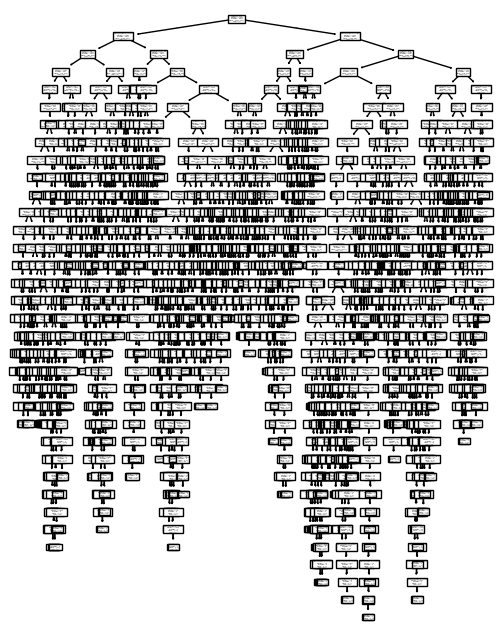

In [217]:
plt.figure(figsize=(6,8))
plot_tree(model,feature_names = model.feature_names_in_,class_names=model.classes_)
plt.show()

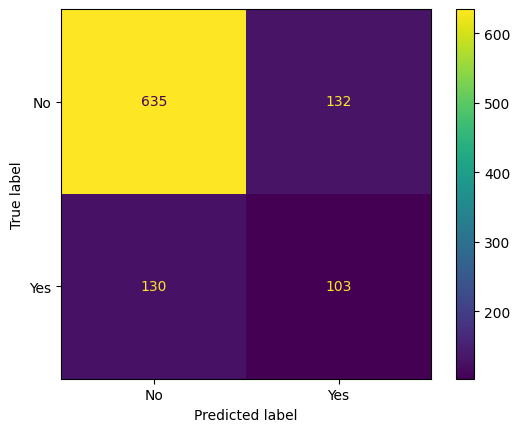

In [202]:
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test)

In [203]:
X.gender.value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

In [223]:
#There is depth of 34, so what we have to do? reduce the depth
#make max_depth=10 and check if there is increase in Yes Yes of confusion matrix

In [242]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=10)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.782

In [243]:
model.get_depth(), model.get_n_leaves()

(10, 305)

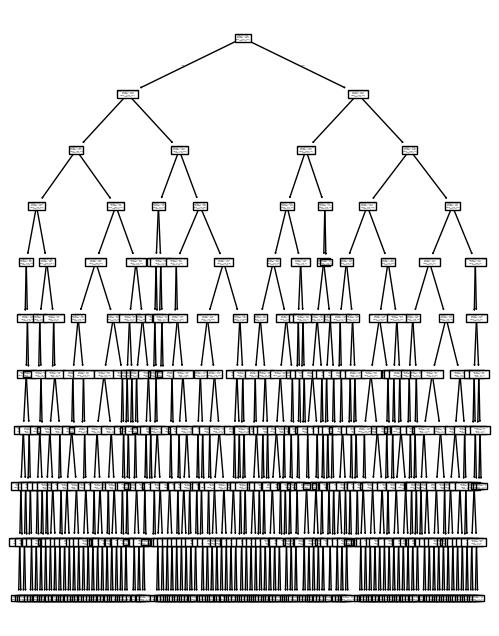

In [244]:
plt.figure(figsize=(6,8))
plot_tree(model,feature_names = model.feature_names_in_,class_names=model.classes_)
plt.show()

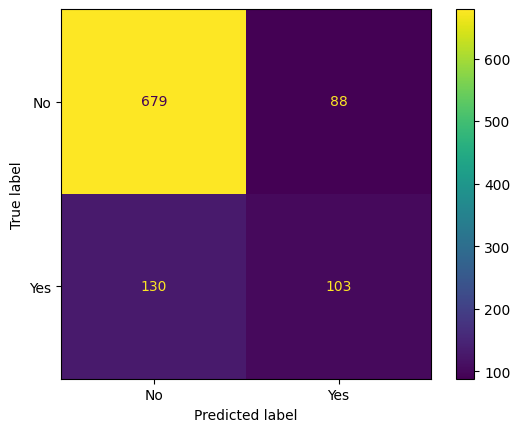

In [245]:
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test)

In [238]:
#there is 1 increase
#What if we decrease the leaf nodes
#max_leaf_nodes=50 #because so many leaf nodes are not required

In [249]:
#with this there will be reduction in training accuracy

In [254]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=10,max_leaf_nodes=15,min_samples_split=20)
model.fit(X_train,y_train)
model.score(X_train,y_train),model.score(X_test,y_test)

(0.79265265596558, 0.804)

In [255]:
model.get_depth(),model.get_n_leaves()

(5, 15)

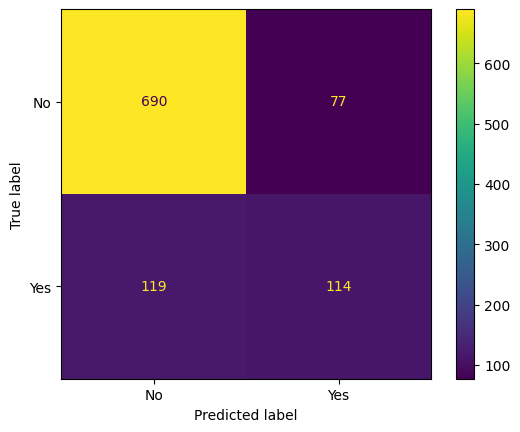

In [256]:
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test)

In [10]:
churn = pd.read_csv('churn.csv')

In [11]:
churn.shape

(7043, 21)

In [12]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [13]:
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
churn.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [15]:
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [16]:
#CONVERT THE DATA TYPE TO FLOAT64 --> we are not able to convert because there are strings

In [11]:
#there is an empty value ' ' 
#but there are some blank values 

In [18]:
churn[churn.TotalCharges==' ']  #--> either delete these records---> or change the type

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [13]:
45*42.30

1903.4999999999998

In [18]:
#Issue in data set ->#monthly charges*12 != total charges 

In [19]:
churn.TotalCharges = churn.MonthlyCharges * churn.tenure #---> total charges is converted to float

In [20]:
#Issue in data set ->#one colum name is in Camel case #one colum name is in lower case

In [21]:
churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [22]:
#Convert into lower case

In [24]:
churn.columns = [i.lower() for i in churn.columns]

In [26]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


<Axes: xlabel='churn', ylabel='count'>

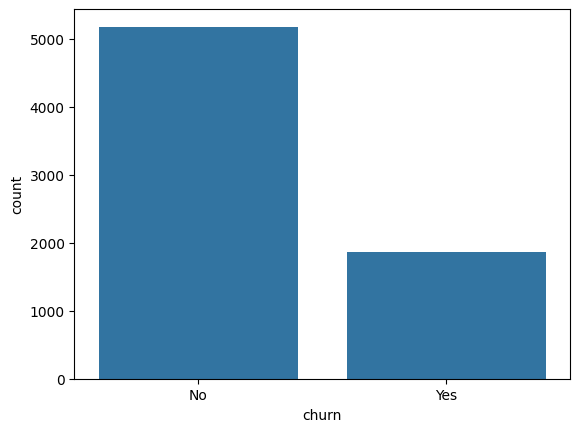

In [27]:
sns.countplot(x='churn',data=churn)

In [28]:
churn.churn.value_counts()

churn
No     5174
Yes    1869
Name: count, dtype: int64

In [29]:
#1869 people left the services 
#We have to identify which customer is likely to churn 

In [30]:
#So y = churn

In [31]:
#Why will the customers move to other plans 
#1)Cost
#2)

In [32]:
#from how many years they are using the services

In [33]:
churn.tenure.describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [34]:
#50%        29.000000 --> 50% of the customers are from less than 29 months
#25%         9.000000

In [35]:
churn.tenure

0        1
1       34
2        2
3       45
4        2
        ..
7038    24
7039    72
7040    11
7041     4
7042    66
Name: tenure, Length: 7043, dtype: int64

In [36]:
churn.tenure.value_counts()

tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64

In [37]:
churn.tenure.describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [38]:
churn[churn.tenure<=30].churn.value_counts(normalize=True) #customers who are there with the company less than 30 months

churn
No     0.608624
Yes    0.391376
Name: proportion, dtype: float64

In [39]:
churn.churn.value_counts(normalize=True)

churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

In [40]:
churn[churn.tenure<=24].churn.value_counts(normalize=True) #customers who are there with the company less than 24 months

churn
No     0.585358
Yes    0.414642
Name: proportion, dtype: float64

In [41]:
churn[churn.tenure>30].churn.value_counts(normalize=True)

churn
No     0.869489
Yes    0.130511
Name: proportion, dtype: float64

In [42]:
#if tenure is more chances of person leaving will be very very less

In [43]:
churn.internetservice.value_counts()

internetservice
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

<Axes: xlabel='internetservice', ylabel='count'>

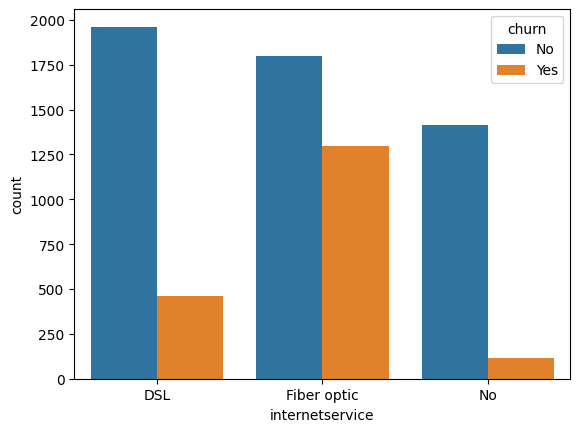

In [44]:
sns.countplot(x='internetservice',data=churn,hue='churn')

In [45]:
#Customers who have been churned are more from Fiber optic

In [46]:
#More people left the fiber optics

<Axes: xlabel='internetservice', ylabel='count'>

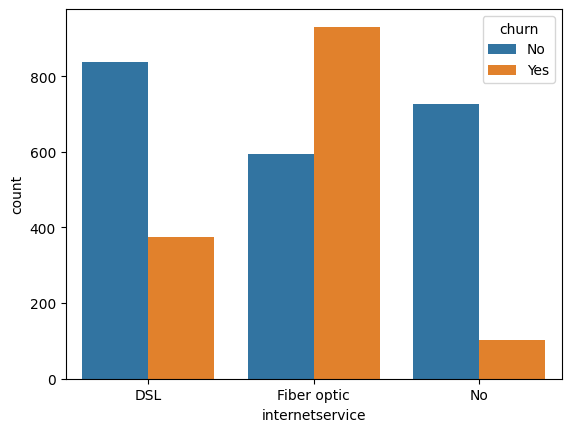

In [47]:
sns.countplot(x='internetservice',data=churn[churn.tenure<30],hue='churn')

In [48]:
#DIFFERENT PLOTS

In [49]:
#swarmplot

/Users/umatrilok/anaconda3/envs/jupyterlab_env/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 53.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/umatrilok/anaconda3/envs/jupyterlab_env/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 66.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/umatrilok/anaconda3/envs/jupyterlab_env/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 88.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='internetservice', ylabel='monthlycharges'>

/Users/umatrilok/anaconda3/envs/jupyterlab_env/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 62.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/umatrilok/anaconda3/envs/jupyterlab_env/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 74.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/umatrilok/anaconda3/envs/jupyterlab_env/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 91.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


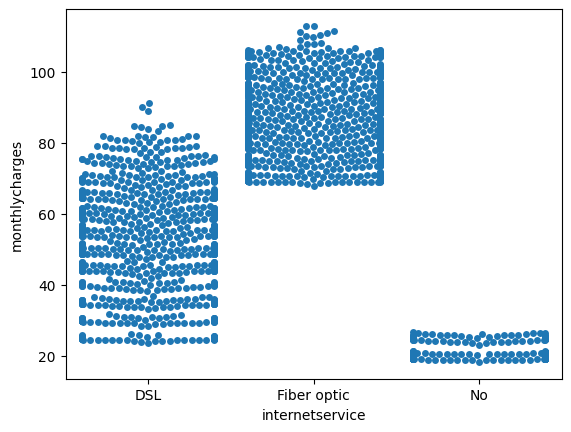

In [50]:
sns.swarmplot(x='internetservice',y='monthlycharges',data=churn[churn.tenure<30])

In [51]:
#from above we understand that Fiber optic services are expensive so more people are likely to leave the services

In [52]:
#swarmplot

/Users/umatrilok/anaconda3/envs/jupyterlab_env/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 34.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/umatrilok/anaconda3/envs/jupyterlab_env/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 42.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/umatrilok/anaconda3/envs/jupyterlab_env/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 78.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='internetservice', ylabel='monthlycharges'>

/Users/umatrilok/anaconda3/envs/jupyterlab_env/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 43.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/umatrilok/anaconda3/envs/jupyterlab_env/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 53.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/umatrilok/anaconda3/envs/jupyterlab_env/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 82.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/umatrilok/anaconda3/envs/jupyterlab_env/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 43.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warn

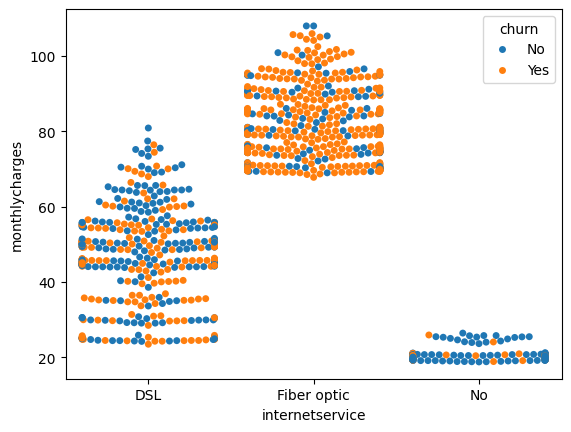

In [53]:
#Who has been churned and who has been not churned
sns.swarmplot(x='internetservice',y='monthlycharges',data=churn[churn.tenure<6],hue='churn')

In [54]:
#montly orange colors 

In [55]:
#stripplot

<Axes: xlabel='internetservice', ylabel='monthlycharges'>

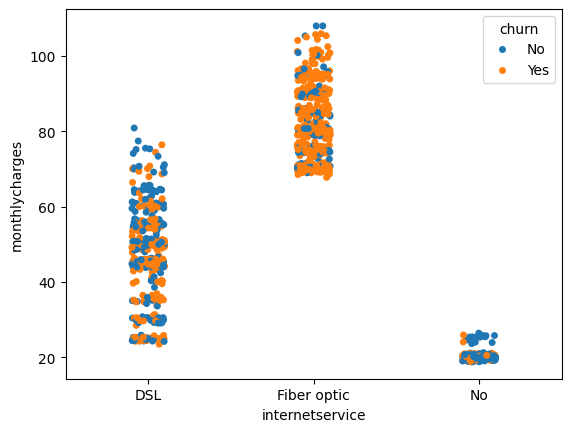

In [56]:
sns.stripplot(x='internetservice',y='monthlycharges',data=churn[churn.tenure<6],hue='churn')

In [57]:
#More orange in middle, 

In [109]:
X = churn[churn.tenure<=30][["tenure","monthlycharges","internetservice"]]
y = churn[churn.tenure<=30]['churn']
X.shape,y.shape

KeyError: "['monthlycharges', 'internetservice'] not in index"

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay

In [60]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=10,test_size=400) #test_size is 400 records
X_train.shape,X_test.shape

((3241, 2), (400, 2))

In [61]:
model = DecisionTreeClassifier(criterion = 'entropy')
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.62

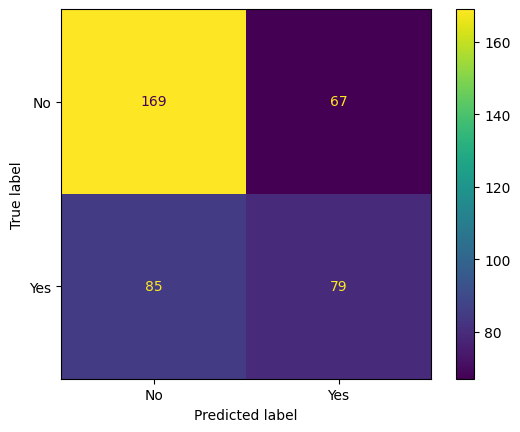

In [62]:
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test)
#lower the value darker the color

In [63]:
#We mainly have to identify the churned people
# 171 people will not leave the services -> so dont have to concentrate, because they dont leave the services
# 65 people we have give the offers, expecting that they will leave the services 
# expecting that 84 people wont churn we dint give the offers but they left the company
# 

In [64]:
#we have not included internet_charges

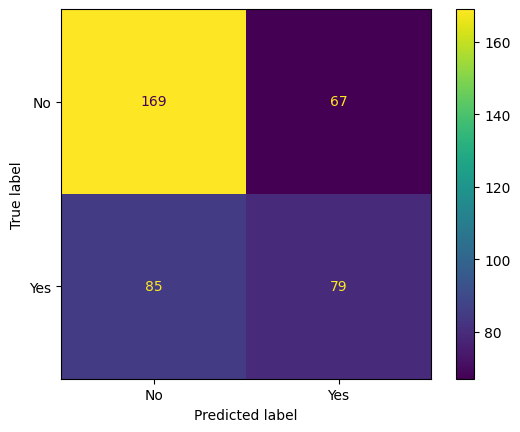

In [65]:
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test)
plt.show()

In [66]:
sklearn,numpy -> all are 

SyntaxError: invalid syntax (3646784716.py, line 1)

In [67]:
fruits ->color ->Green

SyntaxError: invalid syntax (4191268818.py, line 1)